## **4주차 파이썬기초 강의 코드**

### 목차

- 통계적 추론 
- 추정(estimate)의 개념 (점추정, 구간추정) 
- 확률변수의 기대값과 분산 
- 신뢰구간에 대한 이해 

- 가설의 정의  
- 1종,2종 오류 
- 검정을 위한 통계량
- P value 
- 통계적추론 – 데이터가 작을 때 (t 분포) 

---

### **라이브러리**


In [40]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

from scipy.special import comb
from scipy.stats import t, norm

import math


--- 
### **통계적 추론**
- 점추정 구간추정 - 신뢰구간 (p.20)

In [11]:
import scipy.stats as stats
import math

# 주어진 값
mean = 195  # 표본 평균
std_dev = 10  # 모 표준편차
n = 25  # 표본의 크기
confidence_level = 0.95  # 신뢰수준, 유의수준은 0.05로 표현 


# 표준 오차(Standard Error) 계산
std_error = std_dev / math.sqrt(n)

# 신뢰구간 계산
margin_of_error = 1.96 * std_error
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# 결과 출력
print(f"{confidence_level*100:.2f}% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")


95% Confidence Interval: (191.08, 198.92)


- 30명 학생들의 키에 대한 기대값과 분산 (p.21)

In [1]:
import numpy as np

# 주어진 키 데이터
height_data = [
    163, 161, 168, 161, 157, 162, 153, 159, 164, 170,
    152, 160, 157, 168, 150, 165, 156, 151, 162, 150,
    156, 152, 161, 165, 168, 167, 165, 168, 159, 156
]

# numpy 배열로 변환
heights = np.array(height_data)

# 표본 평균 계산
sample_mean = np.mean(heights)

# 표본 분산 계산 (Bessel's correction 적용)
sample_variance = np.sum((heights - sample_mean) ** 2) / (len(heights) - 1)

# 결과 출력
print(f"Sample Mean = {sample_mean:.2f}")
print(f"Sample Variance = {sample_variance:.2f}")

Sample Mean = 160.20
Sample Variance = 35.89


- 30명 학생들의 키에 대한 표본 평균의 분산 (표준편차와 표준오차의 차이) (p.22)

> 표준 편차: 데이터의 개별적인 변동을 측정합니다. (데이터 하나하나가 평균으로부터 얼마나 떨어져 있는지)

> 표준 오차: 표본 평균의 변동을 측정합니다. (여러 표본에서 얻은 평균 값들이 얼마나 떨어져 있는지)

In [4]:
import numpy as np

# 예제 데이터
data = np.array([163, 161, 168, 161, 157, 162, 153, 159, 164, 170,
                 152, 160, 157, 168, 150, 165, 156, 151, 162, 150,
                 156, 152, 161, 165, 168, 167, 165, 168, 159, 156])

# 표본 크기
n = len(data)

# 표본 분산
sample_variance = np.var(data, ddof=1)

# 표준편차 
standard_deviation = np.sqrt(sample_variance)

# 표본 평균의 분산
variance_of_sample_mean = sample_variance / n

# 표준오차 
standard_error = np.sqrt(variance_of_sample_mean)


print(f"표본 분산: {sample_variance:.2f}")
print(f"표본 평균의 분산: {variance_of_sample_mean:.2f}")

print(f"표준 편차: {standard_deviation:.2f}")
print(f"표준 오차: {standard_error:.2f}")



표본 분산: 35.89
표본 평균의 분산: 1.20
표준 편차: 5.99
표준 오차: 1.09


- 모평균에 대한 구간추정 - 신뢰수준, 유의수준 (p.23)

> 신뢰수준(Confidence Level):
통계적 추정치가 얼마나 정확한지를 나타내는 지표로, 주로 %로 표현된다. 예를 들어, 95% 신뢰수준은 우리가 사용한 통계적 방법으로 구한 추정치가 95%의 확률로 모수(실제 값)를 포함하고 있다는 뜻이다.

> 유의수준(Significance Level) :
1에서 신뢰수준을 뺀 값이 유의수준이다. 즉, 모수가 신뢰구간에 포함되지 않을 확률을 의미한다.


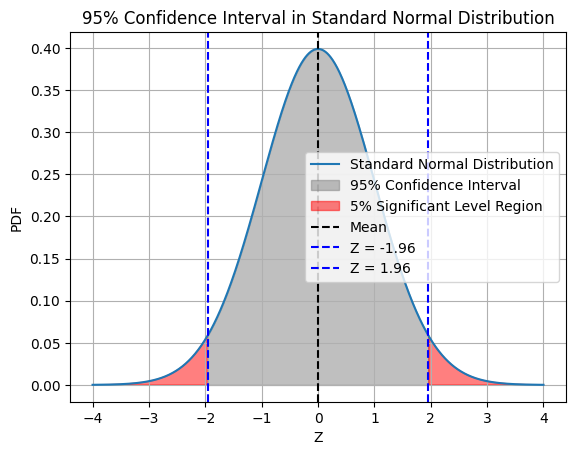

In [33]:

alpha = 0.05  # 유의수준
z_value = stats.norm.ppf(1 - alpha/2)  # Z 값 (양쪽 꼬리에서의 기각역을 고려)
x = np.linspace(-4, 4, 1000)  # x 축 값
y = stats.norm.pdf(x, 0, 1)  # 표준 정규분포의 확률 밀도 함수

# 전체 정규분포 시각화
plt.plot(x, y, label='Standard Normal Distribution')

# 신뢰구간 (양쪽) 색칠하기
plt.fill_between(x, y, where= (x >= -z_value) & (x <= z_value), color='gray', alpha=0.5, label=f'95% Confidence Interval')

# 유의수준(기각역) 색칠하기
plt.fill_between(x, y, where= (x < -z_value) | (x > z_value), color='red', alpha=0.5, label=f'{int(alpha*100)}% Significant Level Region')

# 평균 선 그리기
plt.axvline(0, color='black', linestyle='--', label='Mean')

# Z 값 표시
plt.axvline(-z_value, color='blue', linestyle='--', label=f'Z = {-z_value:.2f}')
plt.axvline(z_value, color='blue', linestyle='--', label=f'Z = {z_value:.2f}')

plt.legend()
plt.title('95% Confidence Interval in Standard Normal Distribution')
plt.xlabel('Z')
plt.ylabel('PDF')
plt.grid(True)
plt.show()

- 모평균에 대한 구간추정 - 신뢰구간 계산 (p.24)


In [31]:
# 주어진 값
mean = 195  # 표본 평균
std_dev = 10  # 모 표준편차
n = 25  # 표본의 크기
confidence_level = 0.95  # 신뢰수준, 유의수준은 0.05로 표현 

# Z 값 계산: 상위 (1 - (1-confidence_level)/2) 위치의 Z 값
z_value = stats.norm.ppf(1 - (1-confidence_level)/2)

# 표준 오차(Standard Error) 계산
std_error = std_dev / math.sqrt(n)

# 신뢰구간 계산
margin_of_error = z_value * std_error
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# 결과 출력
print(f"{confidence_level*100:.2f}% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")


95.00% Confidence Interval: (191.08, 198.92)


- 신뢰구간 시뮬레이션 (p.25-26)

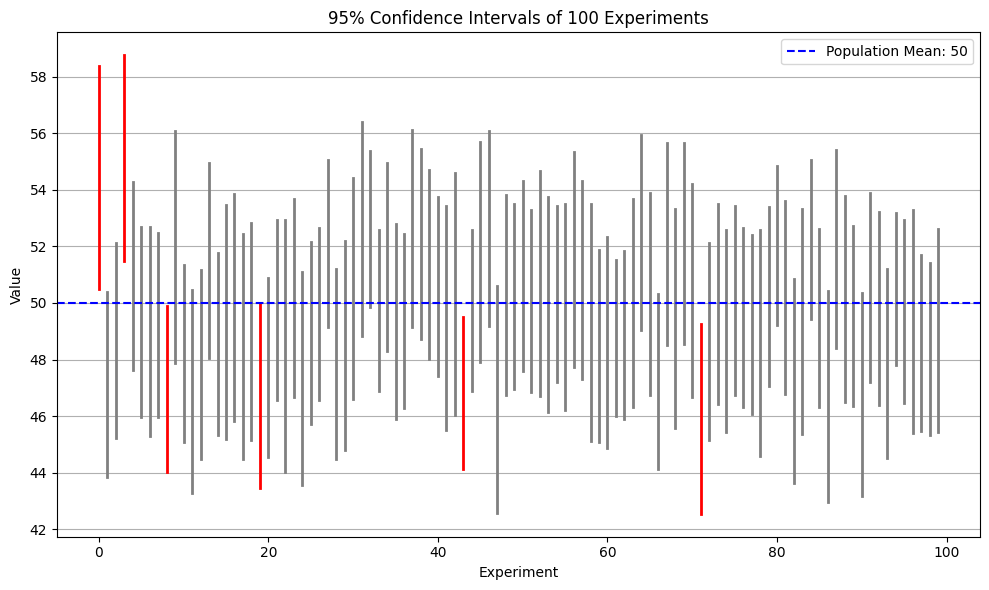

Proportion of Confidence Intervals Containing Population Mean: 94.00%


In [28]:

# 설정값
np.random.seed(0)
mu = 50  # 모평균
sigma = 10  # 모표준편차
n_samples = 30  # 표본 크기
n_experiments = 100  # 시행 횟수
confidence_level = 0.95  # 신뢰수준

# 신뢰구간 계산 및 모평균 포함 여부 체크
contains_mu = []
lower_bounds = []
upper_bounds = []

for _ in range(n_experiments):
    # 데이터 생성 및 통계량 계산
    data = np.random.normal(mu, sigma, n_samples)
    sample_mean = np.mean(data)
    sample_stderr = stats.sem(data)
    
    # 신뢰구간 계산
    ci = stats.norm.interval(confidence_level, loc=sample_mean, scale=sample_stderr)
    lower_bounds.append(ci[0])
    upper_bounds.append(ci[1])
    
    # 모평균 포함 여부 체크
    contains_mu.append(ci[0] <= mu <= ci[1])

# 시각화
plt.figure(figsize=(10, 6))

# 신뢰구간 시각화
for i in range(n_experiments):
    color = 'gray' if contains_mu[i] else 'red'
    plt.plot([i, i], [lower_bounds[i], upper_bounds[i]], color=color, linewidth=2)

# 모평균 시각화
plt.axhline(y=mu, color='blue', linestyle='--', label=f"Population Mean: {mu}")

plt.title("95% Confidence Intervals of 100 Experiments")
plt.xlabel("Experiment")
plt.ylabel("Value")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 모평균 포함 비율 출력
print(f"Proportion of Confidence Intervals Containing Population Mean: {sum(contains_mu) / n_experiments * 100:.2f}%")

- 표준정규 확률분포료 - Z 값 시각화 (p.27)

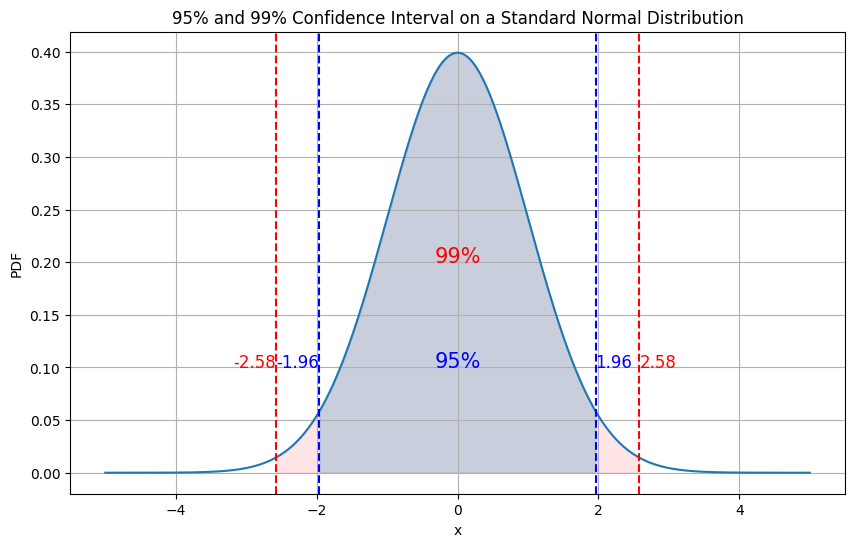

In [29]:
# 평균 0, 표준편차 1인 정규분포를 그립니다.
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, 0, 1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y)

# 95% 신뢰구간을 색칠합니다.
ax.fill_between(x, y, where=(x >= -1.96) & (x <= 1.96), color='skyblue', alpha=0.5)

# 99% 신뢰구간을 색칠 
ax.fill_between(x, y, where=(x >= -2.58) & (x <= 2.58), color='red', alpha=0.1)

# 95% 신뢰구간을 나타내는 선과 텍스트를 추가합니다.
ax.axvline(-1.96, color='blue', linestyle='--')
ax.axvline(1.96, color='blue', linestyle='--')
ax.text(-1.96, 0.1, '-1.96', fontsize=12, color='blue', ha='right')
ax.text(1.96, 0.1, '1.96', fontsize=12, color='blue', ha='left')
ax.text(0, 0.1, '95%', fontsize=15, color='blue', ha='center')

# 99% 신뢰구간을 나타내는 선과 텍스트를 추가합니다.
ax.axvline(-2.58, color='red', linestyle='--')
ax.axvline(2.58, color='red', linestyle='--')
ax.text(-2.58, 0.1, '-2.58', fontsize=12, color='red', ha='right')
ax.text(2.58, 0.1, '2.58', fontsize=12, color='red', ha='left')
ax.text(0, 0.2, '99%', fontsize=15, color='red', ha='center')

plt.title('95% and 99% Confidence Interval on a Standard Normal Distribution')
plt.xlabel('x')
plt.ylabel('PDF')
plt.grid(True)
plt.show()

- Z 분포(표준정규분포) 에서 신뢰수준(유의수준)의 누적확률을 갖는 x 값 찾기 (p.27)

In [30]:
confidence_level = 0.99 
z_value = stats.norm.ppf(1 - (1-confidence_level)/2)
z_value

2.5758293035489004

--- 
### **가설검정**
- 검정통계량과 기각역 (p.33)

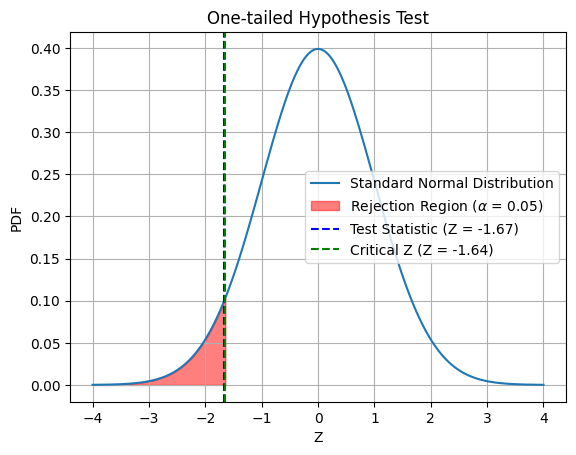

Test Statistic (Z): -1.67
Critical Z value: -1.64


In [36]:

# 주어진 값
mu_0 = 200  # 귀무가설의 평균
X_bar = 195  # 표본평균
sigma = 30  # 표준편차
n = 100  # 표본 크기
alpha = 0.05  # 유의수준

# 검정통계량 계산
Z = (X_bar - mu_0) / (sigma / np.sqrt(n))

# 기각역에 해당하는 Z 값 계산
critical_Z = stats.norm.ppf(alpha)

# 그래프 그리기
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)  # 표준 정규분포

plt.plot(x, y, label="Standard Normal Distribution")

# 기각역 색칠하기
plt.fill_between(x, y, where=x < critical_Z, color='red', alpha=0.5, label=f"Rejection Region ($\\alpha$ = {alpha})")

# 검정통계량 그리기
plt.axvline(Z, color='blue', linestyle='--', label=f"Test Statistic (Z = {Z:.2f})")
plt.axvline(critical_Z, color='green', linestyle='--', label=f"Critical Z (Z = {critical_Z:.2f})")

plt.legend()
plt.title("One-tailed Hypothesis Test")
plt.xlabel("Z")
plt.ylabel("PDF")
plt.grid(True)
plt.show()

# 결과 출력
print(f"Test Statistic (Z): {Z:.2f}")
print(f"Critical Z value: {critical_Z:.2f}")

- 양측, 단측 기각역 (p.34)

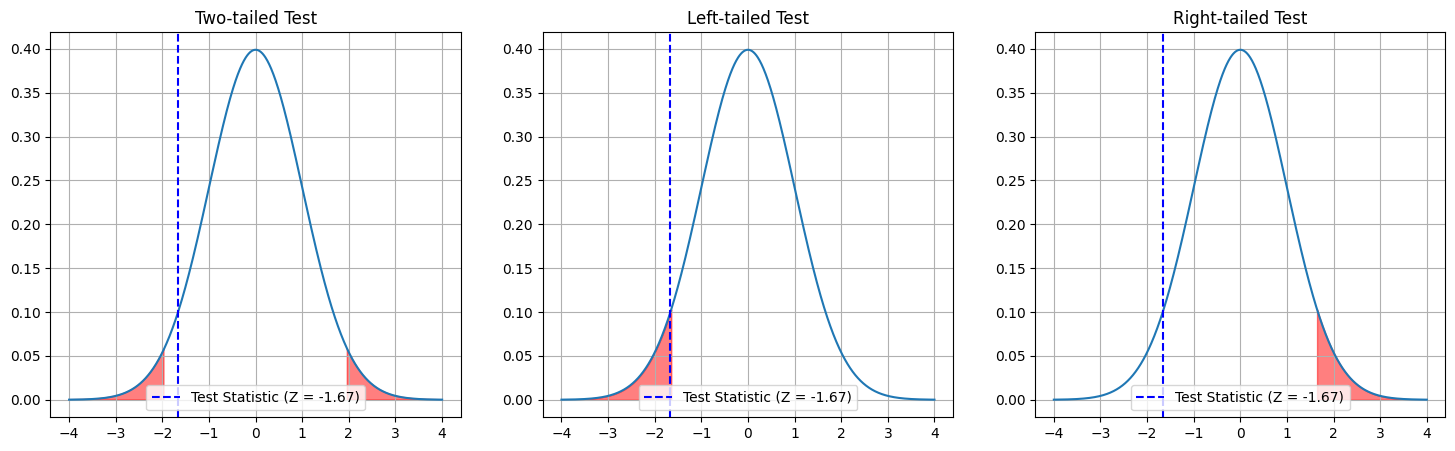

In [35]:

# 주어진 값
mu_0 = 200
X_bar = 195
sigma = 30
n = 100
alpha = 0.05

# 검정통계량 계산
Z = (X_bar - mu_0) / (sigma / np.sqrt(n))

# 그래프 생성
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 양측 검정
axs[0].plot(x, y)
critical_Z_right = stats.norm.ppf(1-alpha/2) 
critical_Z_left = stats.norm.ppf(alpha/2)

axs[0].fill_between(x, y, where=(x > critical_Z_right) | (x < critical_Z_left), color='red', alpha=0.5)
axs[0].axvline(Z, color='blue', linestyle='--', label=f"Test Statistic (Z = {Z:.2f})")
axs[0].set_title("Two-tailed Test")
axs[0].legend()
axs[0].grid(True)

# 단측 검정 (왼쪽)
axs[1].plot(x, y)
critical_Z_left = stats.norm.ppf(alpha)
axs[1].fill_between(x, y, where=x < critical_Z_left, color='red', alpha=0.5)
axs[1].axvline(Z, color='blue', linestyle='--', label=f"Test Statistic (Z = {Z:.2f})")
axs[1].set_title("Left-tailed Test")
axs[1].legend()
axs[1].grid(True)

# 단측 검정 (오른쪽)
axs[2].plot(x, y)
critical_Z_right = stats.norm.ppf(1-alpha)
axs[2].fill_between(x, y, where=x > critical_Z_right, color='red', alpha=0.5)
axs[2].axvline(Z, color='blue', linestyle='--', label=f"Test Statistic (Z = {Z:.2f})")
axs[2].set_title("Right-tailed Test")
axs[2].legend()
axs[2].grid(True)

plt.show()

- P value 계산하기 (p.36)

In [37]:
import numpy as np
from scipy import stats

# 주어진 값
mu_0 = 200
X_bar = 195
sigma = 30
n = 100

# 검정통계량 계산
Z = (X_bar - mu_0) / (sigma / np.sqrt(n))

# 양측 검정의 p-value
p_value_two_tailed = 2 * (1 - stats.norm.cdf(np.abs(Z)))

# 단측 검정의 p-value (평균 < mu_0)
p_value_one_tailed_lower = stats.norm.cdf(Z)

# 단측 검정의 p-value (평균 > mu_0)
p_value_one_tailed_upper = 1 - stats.norm.cdf(Z)

print(f"검정통계량 Z: {Z:.4f}")
print(f"양측 검정의 p-value: {p_value_two_tailed:.4f}")
print(f"단측 검정의 p-value (평균 < mu_0): {p_value_one_tailed_lower:.4f}")
print(f"단측 검정의 p-value (평균 > mu_0): {p_value_one_tailed_upper:.4f}")

검정통계량 Z: -1.6667
양측 검정의 p-value: 0.0956
단측 검정의 p-value (평균 < mu_0): 0.0478
단측 검정의 p-value (평균 > mu_0): 0.9522


- 검정통계량의 누적확률 (p.36)

In [38]:
stats.norm.cdf(np.abs(Z))

0.9522096477271853

--- 
### **통계적 추정 - 데이터가 작을 때**
- t 분포 시각화 (p.41)

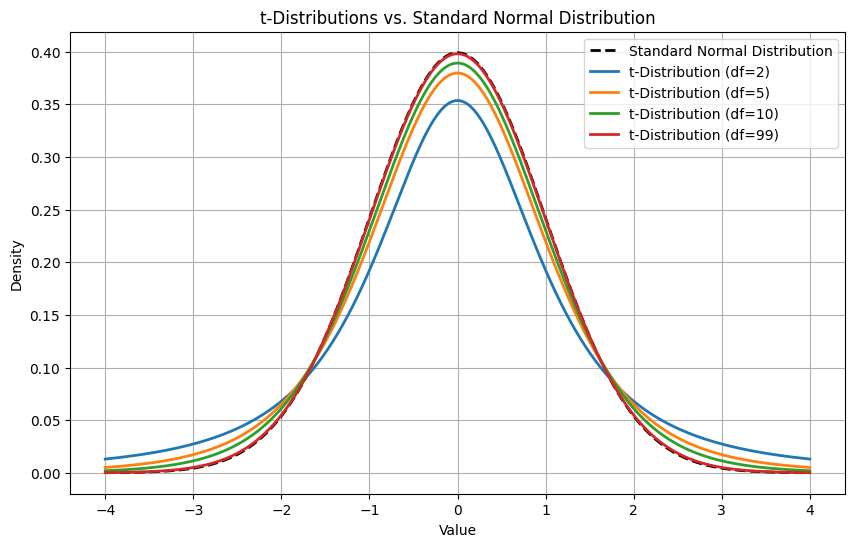

In [41]:
# 그래프 x 범위 설정
x = np.linspace(-4, 4, 1000)

# 데이터 사이즈에 따른 t 분포 그래프 생성
degrees_of_freedom = [2, 5, 10, 99]  # df = n-1

plt.figure(figsize=(10, 6))

# 표준 정규 분포 그래프
plt.plot(x, norm.pdf(x, 0, 1), label="Standard Normal Distribution", linewidth=2, linestyle='--', color='black')

# 각 자유도에 대한 t 분포 그래프
for df in degrees_of_freedom:
    plt.plot(x, t.pdf(x, df), label=f"t-Distribution (df={df})", linewidth=2)

# 그래프 구성 요소 추가
plt.title("t-Distributions vs. Standard Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

- t 분포에서의 구간 추정 (p.42)

In [46]:

# 주어진 값
X_bar = 195  # 표본 평균
n = 25  # 표본의 크기
confidence_level = 0.95  # 신뢰 수준

# 표준정규분포 사용 시
sigma = 10  # 모집단 표준편차 (알려져 있음)
z_critical = stats.norm.ppf((1 + confidence_level) / 2)  # z-분포의 임계값
margin_of_error_z = z_critical * (sigma / np.sqrt(n))
confidence_interval_z = (X_bar - margin_of_error_z, X_bar + margin_of_error_z)

# t-분포 사용 시
s = 10  # 표본의 표준편차 (모집단 표준편차를 모르므로 s를 사용)
df = n - 1  # 자유도
t_critical = stats.t.ppf((1 + confidence_level) / 2, df)  # t-분포의 임계값
margin_of_error_t = t_critical * (s / np.sqrt(n))
confidence_interval_t = (X_bar - margin_of_error_t, X_bar + margin_of_error_t)

# 결과 출력
print(f"Z-distribution Confidence Interval: {confidence_interval_z}")
print(f"T-distribution Confidence Interval: {confidence_interval_t}")

Z-distribution Confidence Interval: (191.0800720309199, 198.9199279690801)
T-distribution Confidence Interval: (190.87220287674396, 199.12779712325604)


In [47]:

# 주어진 값
mu_0 = 200  # 귀무가설에서 주어진 모평균의 값
X_bar = 195  # 표본 평균
n = 25  # 표본의 크기
sigma = 10  # 모집단 표준편차
s = 10  # 표본의 표준편차

# 표준정규분포(z-분포)를 사용한 검정
Z = (X_bar - mu_0) / (sigma / np.sqrt(n))  # 검정 통계량 계산
p_value_z = 2 * (1 - stats.norm.cdf(abs(Z)))  # 양측 검정의 p-value 계산

# t-분포를 사용한 검정
df = n - 1  # 자유도
T = (X_bar - mu_0) / (s / np.sqrt(n))  # 검정 통계량 계산
p_value_t = 2 * (1 - stats.t.cdf(abs(T), df))  # 양측 검정의 p-value 계산

# 결과 출력
print(f"Z-statistic: {Z:.2f}, p-value using Z-distribution: {p_value_z:.4f}")
print(f"T-statistic: {T:.2f}, p-value using T-distribution: {p_value_t:.4f}")

Z-statistic: -2.50, p-value using Z-distribution: 0.0124
T-statistic: -2.50, p-value using T-distribution: 0.0197


- t 분포의 기각역 (p.46)
- t 분포가 표준정규분포보다 큰 p value 를 갖는 이유

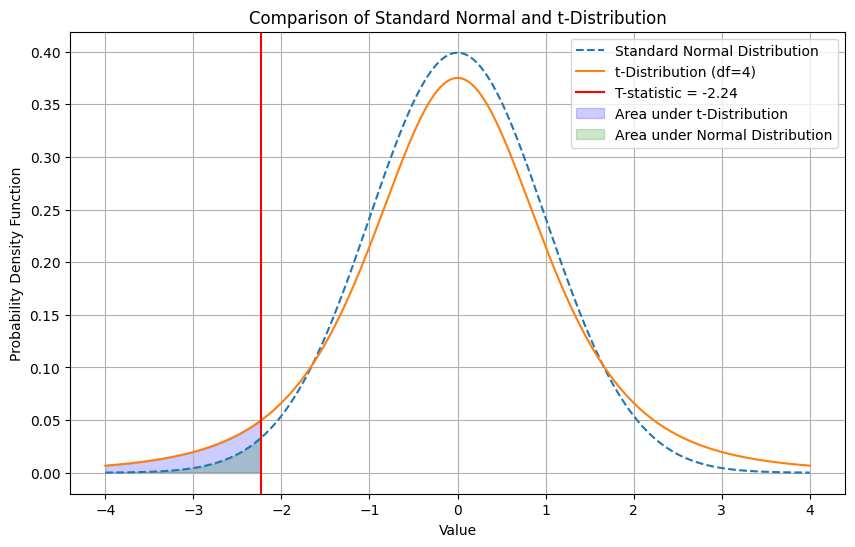

p-value using t-distribution: 0.045
p-value using normal distribution: 0.013


In [52]:
# 주어진 값
mu_0 = 200  # 귀무가설 평균
X_bar = 195  # 표본 평균
s = 5  # 표본 표준편차
n = 5  # 표본 크기
alpha = 0.05  # 유의수준

# 검정통계량 계산
T_statistic = (X_bar - mu_0) / (s / np.sqrt(n))  # t 검정통계량
Z_statistic = (X_bar - mu_0) / (s / np.sqrt(n))  # z 검정통계량

df = n - 1  # 자유도

# x 축 값
x = np.linspace(-4, 4, 1000)

# 정규 분포와 t 분포의 PDF 계산
y_norm = norm.pdf(x)
y_t = t.pdf(x, df=df)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y_norm, label='Standard Normal Distribution', linestyle='--')
plt.plot(x, y_t, label=f't-Distribution (df={df})')
plt.axvline(T_statistic, color='r', linestyle='-', label=f'T-statistic = {T_statistic:.2f}')
plt.fill_between(x, y_t, where=(x <= T_statistic), alpha=0.2, color='blue', label='Area under t-Distribution')
plt.fill_between(x, y_norm, where=(x <= Z_statistic), alpha=0.2, color='green', label='Area under Normal Distribution')

# 레이블, 제목 추가
plt.legend()
plt.title('Comparison of Standard Normal and t-Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density Function')
plt.grid(True)
plt.show()

# p-value 계산
p_value_t = t.cdf(T_statistic, df=df)
p_value_z = norm.cdf(Z_statistic)

print(f"p-value using t-distribution: {p_value_t:.3f}")
print(f"p-value using normal distribution: {p_value_z:.3f}")